# Project 3

Marisa Aquilina, Emily Turvey

In [1]:
import pandas as pd
from symbulate import *
%matplotlib inline

### Problem 1

In [2]:
def get_queue():
    pump_loc = BoxModel(['Left', 'Right', 'Either'], probs=[0.3, 0.3, 0.4]).draw()
    if pump_loc == 'Left':
        return (pump_loc, BoxModel([1, 3, 5]).draw())
    elif pump_loc == 'Right':
        return (pump_loc, BoxModel([2, 4, 6]).draw())
    else:
        return (pump_loc, BoxModel([i for i in range(1,7)]).draw())
    
def get_shortest_queue(df1, pump_loc, time):
    if pump_loc == 'Left':
        poss_queue = [1, 3, 5]
        num_in_queues = [(queue, get_number_cars_in_queue(df1, queue, time)) for queue in poss_queue]
    elif pump_loc == 'Right':
        poss_queue = [2, 4, 6]
        num_in_queues = [(queue, get_number_cars_in_queue(df1, queue, time)) for queue in poss_queue]
    else:
        poss_queue = [i for i in range(1,7)]
        num_in_queues = [(queue, get_number_cars_in_queue(df1, queue, time)) for queue in poss_queue]
    min_pair = num_in_queues[0]
    for pair in num_in_queues:
        if pair[1] < min_pair[1]:
            min_pair = pair
    min_pairs = []
    for pair in num_in_queues:
        if pair[1] == min_pair[1]:
            min_pairs.append(pair)
    min_queues = [pair[0] for pair in min_pairs]
    return BoxModel(min_queues).draw()

def get_number_cars_in_queue(df1, queue, time):
    try:
        return df1[(df1.queue == queue) & (df1.arrival_time < time) & (df1.dept_time > time)].tail(1).cars_ahead.values[0] + 1
    except:
        return 0
    
def get_interarrival_period():
    return sum(PoissonProcess(rate = 1).ArrivalTimes().sim(1)[1])

def get_service_period():
    return sum(PoissonProcess(rate = 0.2).ArrivalTimes().sim(1)[1])

In [3]:
variables = ["queue", "pump_loc", "interarrival_period",  "service_period", "cars_ahead", "arrival_time", "dept_time", "system_period"]
df1 = pd.DataFrame(columns=variables)
for i in range(0,11000):
    interarrival_period = get_interarrival_period()
    service_period = get_service_period()
    queue_data = get_queue()
    pump_loc = queue_data[0]
    arrival_time = interarrival_period if i == 0 else df1["interarrival_period"].sum(axis=0) + interarrival_period
    queue = get_shortest_queue(df1, pump_loc, arrival_time)
    cars_ahead = len(df1[(df1.queue == queue) & (df1.dept_time > arrival_time)])
    dept_time = arrival_time + service_period if (cars_ahead in (0,1)) else min(df1[df1.queue == queue].tail(2).dept_time.values[0], df1[df1.queue == queue].tail(2).dept_time.values[1]) + service_period
    df1 = df1.append(pd.DataFrame(
        data=[[queue, pump_loc, interarrival_period, service_period, cars_ahead, 
        arrival_time,dept_time, dept_time - arrival_time]], columns=variables)).reset_index(drop=True)
df1

,queue,pump_loc,interarrival_period,service_period,cars_ahead,arrival_time,dept_time,system_period
0,5,Left,0.594069,1.013355,0,0.594069,1.607424,1.013355
1,1,Left,0.108641,0.956243,0,0.702710,1.658952,0.956243
2,3,Left,1.691781,13.151895,0,2.394490,15.546385,13.151895
3,1,Either,0.885010,2.296301,0,3.279500,5.575802,2.296301
4,5,Left,0.656782,2.209790,0,3.936282,6.146072,2.209790
5,1,Left,0.107505,13.970098,1,4.043787,18.013885,13.970098
6,2,Right,0.081235,23.146115,0,4.125022,27.271137,23.146115
7,6,Either,0.126013,3.961929,0,4.251035,8.212964,3.961929
8,4,Right,0.465639,5.963499,0,4.716674,10.680173,5.963499
9,4,Either,0.189701,4.211786,1,4.906375,9.118161,4.211786


Getting the value of Xi(t) for given i (queue) and t (time):

In [4]:
get_number_cars_in_queue(df1, 1, 50)

1

### Problem 2

In [5]:
def get_number_cars_in_system(df1, time):
    return len(df1[(df1.arrival_time < time) & (df1.dept_time > time)])

num_cars_in_system = {}
total_mins_in_week = 1*60*24*7

for i in range(total_mins_in_week):
    num = get_number_cars_in_system(df1, i)
    if num in num_cars_in_system:
        num_cars_in_system[num] += 1
    else:
        num_cars_in_system[num] = 1
        
props = {}

for key, val in num_cars_in_system.items():
    props[key] = val/total_mins_in_week
props

{0: 0.00625,
 1: 0.03293650793650794,
 2: 0.07936507936507936,
 3: 0.1351190476190476,
 4: 0.17926587301587302,
 5: 0.17708333333333334,
 6: 0.14206349206349206,
 7: 0.10634920634920635,
 8: 0.06597222222222222,
 9: 0.04007936507936508,
 10: 0.021825396825396824,
 11: 0.008134920634920636,
 12: 0.0035714285714285713,
 13: 0.000496031746031746,
 14: 0.0010912698412698413,
 15: 0.0003968253968253968}

### Problem 3

In [6]:
props[0]

0.00625

### Problem 4

In [7]:
avg = 0
for key, val in props.items():
    avg += key*val
avg

5.063095238095238

### Problem 5

In [8]:
cumulative = 0 
key_95 = None
for key, val in props.items():
    if cumulative > 0.95:
        key_95 = key
        break
    cumulative += val
key_95

11

### Problem 6

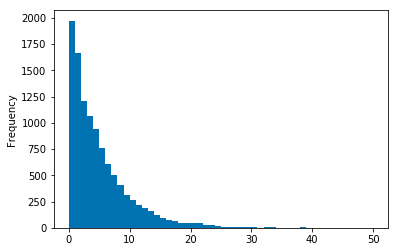

In [9]:
df1.system_period
df1.system_period.plot.hist(bins=50, range=[0, 50])

### Problem 7

In [10]:
df1.system_period.mean()

5.011609218371775

### Problem 8

In [11]:
sorted = df1.system_period.sort_values(ascending=True).reset_index(drop=True)
sorted[int(len(sorted)*0.95)]

15.002531051042297

### Part 2

New model: Six islands with 1 pump on each side

In [12]:
def get_queue():
    pump_loc = BoxModel(['Left', 'Right', 'Either'], probs=[0.3, 0.3, 0.4]).draw()
    if pump_loc == 'Left':
        return (pump_loc, BoxModel([1, 3, 5, 7, 9, 11]).draw())
    elif pump_loc == 'Right':
        return (pump_loc, BoxModel([2, 4, 6, 8, 10, 12]).draw())
    else:
        return (pump_loc, BoxModel([i for i in range(1,13)]).draw())
    
def get_shortest_queue(df2, pump_loc, time):
    if pump_loc == 'Left':
        poss_queue = [1, 3, 5, 7, 9, 11]
        num_in_queues = [(queue, get_number_cars_in_queue(df2, queue, time)) for queue in poss_queue]
    elif pump_loc == 'Right':
        poss_queue = [2, 4, 6, 8, 10, 12]
        num_in_queues = [(queue, get_number_cars_in_queue(df2, queue, time)) for queue in poss_queue]
    else:
        poss_queue = [i for i in range(1,13)]
        num_in_queues = [(queue, get_number_cars_in_queue(df2, queue, time)) for queue in poss_queue]
    min_pair = num_in_queues[0]
    for pair in num_in_queues:
        if pair[1] < min_pair[1]:
            min_pair = pair
    min_pairs = []
    for pair in num_in_queues:
        if pair[1] == min_pair[1]:
            min_pairs.append(pair)
    min_queues = [pair[0] for pair in min_pairs]
    return BoxModel(min_queues).draw()
    
def get_number_cars_in_queue(df2, queue, time):
    try:
        return df2[(df2.queue == queue) & (df2.arrival_time < time) & (df2.dept_time > time)].tail(1).cars_ahead.values[0] + 1
    except:
        return 0
    
def get_interarrival_period():
    return sum(PoissonProcess(rate = 1).ArrivalTimes().sim(1)[1])

def get_service_period():
    return sum(PoissonProcess(rate = 0.2).ArrivalTimes().sim(1)[1])

In [13]:
variables = ["queue", "pump_loc", "interarrival_period",  "service_period", "cars_ahead", "arrival_time", "dept_time", "system_period"]
df2 = pd.DataFrame(columns=variables)
for i in range(0,11000):
    interarrival_period = get_interarrival_period()
    service_period = get_service_period()
    queue_data = get_queue()
    pump_loc = queue_data[0]
    arrival_time = interarrival_period if i == 0 else df2["interarrival_period"].sum(axis=0) + interarrival_period
    queue = get_shortest_queue(df2, pump_loc, arrival_time)
    cars_ahead = len(df2[(df2.queue == queue) & (df2.dept_time > arrival_time)])
    dept_time = arrival_time + service_period if cars_ahead == 0 else df2[df2.queue == queue].tail(1).dept_time.values[0] + service_period
    df2 = df2.append(pd.DataFrame(
        data=[[queue, pump_loc, interarrival_period, service_period, cars_ahead, 
        arrival_time,dept_time, dept_time - arrival_time]], columns=variables)).reset_index(drop=True)
df2

,queue,pump_loc,interarrival_period,service_period,cars_ahead,arrival_time,dept_time,system_period
0,10,Right,0.674968,0.845483,0,0.674968,1.520451,0.845483
1,4,Either,0.883536,7.913128,0,1.558504,9.471632,7.913128
2,10,Right,3.616318,6.933436,0,5.174823,12.108259,6.933436
3,1,Either,0.777970,3.515718,0,5.952793,9.468511,3.515718
4,7,Either,1.264062,1.299116,0,7.216855,8.515971,1.299116
5,3,Left,1.289720,4.574008,0,8.506574,13.080583,4.574008
6,11,Left,0.073411,3.643854,0,8.579986,12.223840,3.643854
7,9,Either,0.312885,3.180828,0,8.892870,12.073699,3.180828
8,2,Right,2.927876,0.828589,0,11.820746,12.649336,0.828589
9,5,Left,2.074753,6.200020,0,13.895500,20.095520,6.200020


In [14]:
def get_number_cars_in_system(df2, time):
    return len(df2[(df2.arrival_time < time) & (df2.dept_time > time)])

num_cars_in_system = {}
total_mins_in_week = 1*60*24*7

for i in range(total_mins_in_week):
    num = get_number_cars_in_system(df2, i)
    if num in num_cars_in_system:
        num_cars_in_system[num] += 1
    else:
        num_cars_in_system[num] = 1
        
props = {}

for key, val in num_cars_in_system.items():
    props[key] = val/total_mins_in_week

avg = 0
for key, val in props.items():
    avg += key*val
avg

5.079265873015874

As we can see from above, the average number of cars in the system is slightly higher than that of the first model (in the long run).

In [15]:
props

{0: 0.005456349206349206,
 1: 0.028273809523809524,
 2: 0.08382936507936507,
 3: 0.14136904761904762,
 4: 0.1732142857142857,
 5: 0.1757936507936508,
 6: 0.14226190476190476,
 7: 0.1076388888888889,
 8: 0.06825396825396825,
 9: 0.03869047619047619,
 10: 0.015873015873015872,
 11: 0.010615079365079366,
 12: 0.004761904761904762,
 13: 0.002777777777777778,
 14: 0.0007936507936507937,
 15: 0.0001984126984126984,
 16: 9.92063492063492e-05,
 17: 9.92063492063492e-05}

The proportion of time for which there are 0 cars in the system is approximately the same for this model (in the long run).